# Logistic Regression

Implement Logistic Regression

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple

## Data

In [70]:
# One Variable 
x_train = np.array([0., 1, 2, 3, 4, 5]) 
y_train = np.array([0,  0, 0, 1, 1, 1])

# Two Variable 
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [71]:
def plot_2_variable_data(X_data : np.ndarray, y_data : np.ndarray, ax : Axes) -> Axes:

  yes = y_data == 0
  no = y_data == 1

  yes_x_1, yes_x_2 = X_data[yes].T
  no_x_1, no_x_2 = X_data[no].T

  ax.scatter(yes_x_1, yes_x_2, marker='x', s=100, c='red', label='y=1')
  ax.scatter(no_x_1, no_x_2, marker='o', s=100, label='y=0')

  return ax

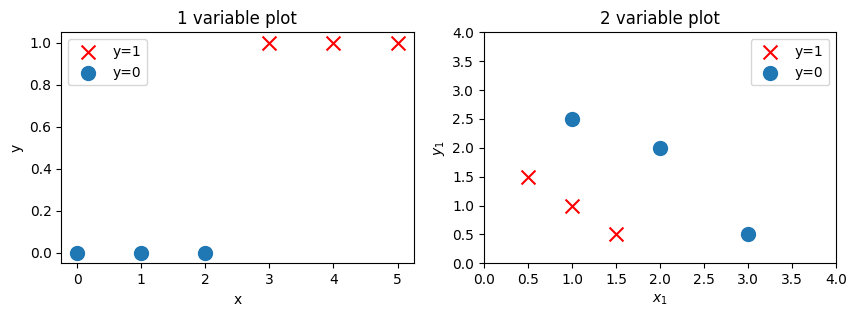

In [72]:
yes = y_train == 1
no = y_train == 0

fig,ax= plt.subplots(1, 2, figsize=(10, 3))


ax[0].scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
ax[0].scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('1 variable plot')
ax[0].legend()

ax[1] = plot_2_variable_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$y_1$')
ax[1].set_title('2 variable plot')
ax[1].legend()

plt.show()

## Functions

In [97]:
def g_z(z : float) -> float:
  return 1.0 / (1 + np.exp(-z))

In [98]:
def fwb_x(x_vec: np.ndarray, w_vec : np.ndarray, b : float) -> float:
  z = np.dot(w_vec, x_vec) + b
  return g_z(z)

In [99]:
def J_wb(x_vec : np.ndarray, y_vec : np.ndarray, w_vec : np.ndarray, b : float):
  m = y_vec.shape[0]

  my_sum = 0
  for i in range(m):
    result_fwb_x = fwb_x(x_vec[i], w_vec, b)
    yes_section = y_vec[i] * np.log(result_fwb_x)
    no_section = (1 - y_vec[i]) * np.log(1 - result_fwb_x)
    my_sum += yes_section + no_section
  
  return (-1.0 / m) * my_sum 




In [177]:
def d_d_J(x_vec : np.ndarray, y_vec : np.ndarray, w_vec : np.ndarray, b: float) -> Tuple[np.ndarray, float]:
  m = y_vec.shape[0]

  d_dw_sums = np.zeros(w_vec.shape[0]) 
  d_db_sum = 0
  for i in range(m):
    result_fwb_x = fwb_x(x_vec[i], w_vec, b)
    diff = result_fwb_x - y_vec[i]

    for j in range(len(d_dw_sums)):
      d_dw_sums[j] += diff * x_vec[i][j]

    d_db_sum += diff

  return (1.0 / m) * d_dw_sums, (1.0 / m) * d_db_sum



In [165]:
def gradient_descent(x_vec : np.ndarray, y_vec : np.ndarray, starting_w_vec: np.ndarray, starting_b : float, alpha : float, num_of_iterations : int = 10):
  ITERATIONS = num_of_iterations

  w_vec = np.copy(starting_w_vec)
  b = starting_b

  costs = []

  for i in range(ITERATIONS):
    costs.append(J_wb(x_vec, y_vec, w_vec, b))

    d_dws, d_db = d_d_J(x_vec, y_vec, w_vec, b)

    w_vec = w_vec - (alpha * d_dws)
    b = b - (alpha * d_db)

  
  return costs, w_vec, b


## Use Functions

## One variable Gradient Descent

In [122]:
x_train_1d = np.expand_dims(x_train, axis=1)
starting_w_vec_1 = [0]

### Finding right alpha

In [180]:
def plot_cost_per_alpha(alpha : int, ax : Axes):
  NUM_OF_ITERATIONS = 20
  costs, w_vec, b = gradient_descent(x_train_1d, y_train, starting_w_vec_1, 0, alpha, NUM_OF_ITERATIONS)
  ax.scatter(range(1, len(costs) + 1), costs)
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title(f'Cost for alpha={alpha}')

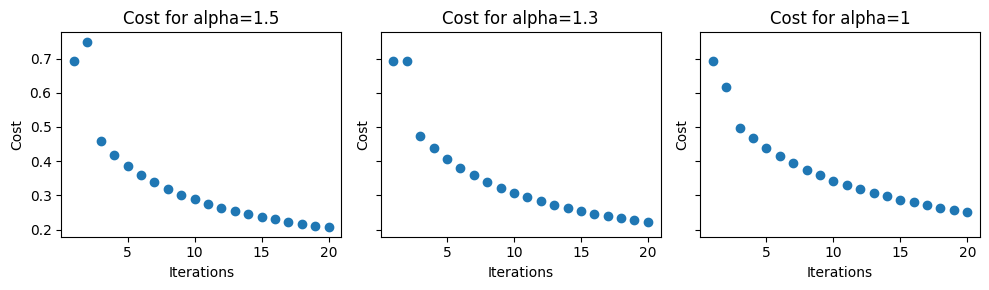

In [181]:
fig,ax= plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)

alphas = [1.5, 1.3, 1]

for i, alpha in enumerate(alphas):
  plot_cost_per_alpha(alpha, ax[i])

plt.tight_layout()
plt.show()

In [189]:
ALPHA = 1

We choose **&alpha; = 1** as it is the largest alpha that will give you a smooth line

### Running Gradient Descent

In [196]:
NUM_OF_ITERATIONS = 150
costs, w_vec, b = gradient_descent(x_train_1d, y_train, starting_w_vec_1, 0, ALPHA, NUM_OF_ITERATIONS)

Final cost:  0.09144877352804318


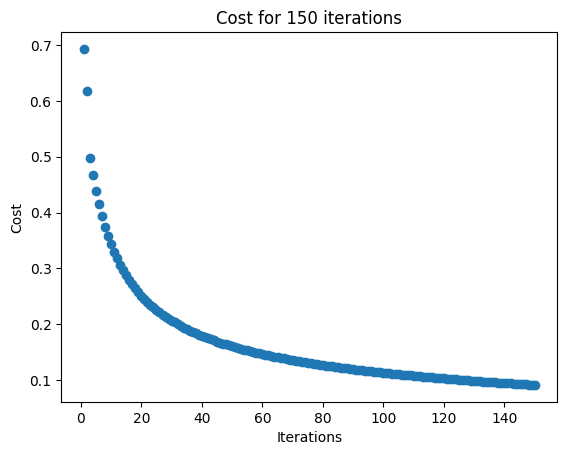

In [200]:
print("Final cost: ", costs[-1])
plt.scatter(range(1, len(costs) + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title(f"Cost for {NUM_OF_ITERATIONS} iterations")
plt.show()

From observing the graph above, the gradient descent is producing diminishing returns. Our final cost is **0.091** 
which is pretty dang good. We will proceed with the weight and bias produced

In [201]:
print(f'w: {w_vec}')
print(f'b: {b}')

w: [2.57092833]
b: -6.163357735026824


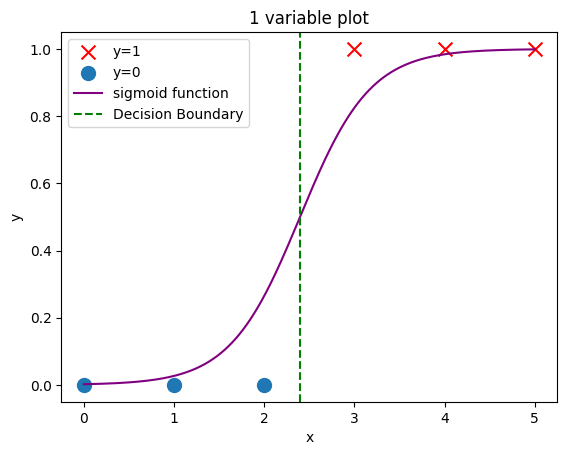

In [217]:
sigmoid_function_x = np.linspace(np.min(x_train), np.max(x_train), 500)
sigmoid_function_y = [] 
for x in sigmoid_function_x:
  sigmoid_function_y.append(fwb_x(x, w_vec, b))


yes = y_train == 1
no = y_train == 0

plt.scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
plt.scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')


decision_boundary_x = -b / w_vec
plt.plot(sigmoid_function_x, sigmoid_function_y, color="purple", label='sigmoid function')
plt.axvline(decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.title('1 variable plot')
plt.legend()